In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/Users/yehyaa/.pyenv/versions/3.6.3/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [135]:
import seaborn

In [3]:
from glob import glob

In [2]:
%matplotlib inline

In [206]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = (xB - xA) * (yB - yA)

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [207]:
gt = glob('/Users/yehyaa/Downloads/data/task3/gt/*')

In [241]:
curve = []
# gt_file, test_file = next(zip(gt, test_files))
for thr in range(25, 100, 5):
    TP, FP, FN = 0, 0, 0

    print('Processing thr={}'.format(thr))
    test_files = glob('output/task3/0.{}0000_*_predictions.txt'.format(thr))
    for gt_file, test_file in zip(gt, test_files):
#         print("Processing {} ...".format(test_file))

        df_gt = pd.read_csv(gt_file, delimiter=' ', names=['label', 'x1', 'y1', 'x2', 'y2'])
        df_test = pd.read_csv(test_file, delimiter=' ', names=['label', 'x', 'y', 'width', 'height'])

        for i, box_test in df_test.iterrows():
            highest_iou = 0.0
            highest_index = -1

            for j, box_gt in df_gt.iterrows():
                if box_gt.label != box_test.label:
                    # Loop over boxes of the same label only
                    continue

                bbox_gt = [box_gt.x1, box_gt.y1, box_gt.x2, box_gt.y2]
                bbox_test = [box_test.x, box_test.y, box_test.x+box_test.width, box_test.y+box_test.height]

                iou = bb_intersection_over_union(bbox_gt, bbox_test)

    #             print("Matching ({}, {}, {}, {}) with ({}, {}, {}, {}) -- IoU= {}".format(
    #                 bbox_test[0], bbox_test[1], bbox_test[2], bbox_test[3],
    #                 bbox_gt[0], bbox_gt[1], bbox_gt[2], bbox_gt[3], iou
    #             ))

                if iou > highest_iou:
                    highest_iou = iou
                    highest_index = j

            if highest_iou > 0.5:
                # True Positive
                TP += 1
                df_gt.drop(highest_index, inplace=True)
            else:
                # False Positives
                FP += 1

        FN += df_gt.label.count()
        
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    curve += [( thr, precision, recall, TP, FP, FN )]

Processing thr=25
Processing thr=30
Processing thr=35
Processing thr=40
Processing thr=45
Processing thr=50
Processing thr=55
Processing thr=60
Processing thr=65
Processing thr=70
Processing thr=75
Processing thr=80
Processing thr=85
Processing thr=90
Processing thr=95


In [242]:
dfCurve = pd.DataFrame(curve, columns=[ 'Thr', 'Precision', 'Recall', 'TP', 'FP', 'FN' ])

In [243]:
dfCurve

,Thr,Precision,Recall,TP,FP,FN
0,25,0.131658,0.992424,131,864,1
1,30,0.134635,0.992424,131,842,1
2,35,0.145233,0.992424,131,771,1
3,40,0.166453,0.984848,130,651,2
4,45,0.190193,0.969697,128,545,4
5,50,0.236059,0.962121,127,411,5
6,55,0.309582,0.954545,126,281,6
7,60,0.435088,0.939394,124,161,8
8,65,0.530172,0.931818,123,109,9
9,70,0.672222,0.916667,121,59,11


In [244]:
dfCurve.to_csv("curve_100_small_hog_nms_iou.csv")

In [210]:
def print_curve(dfCurve):
    dfCurve['F1Score'] = 2 / (1 / dfCurve.Precision + 1 / dfCurve.Recall)
    dfCurve['Accuracy'] = dfCurve.TP / (dfCurve.TP + dfCurve.FP + dfCurve.FN)
    return dfCurve

In [247]:
print_curve(dfCurve_100_small_hog_nms_iou)

,Unnamed: 0,Thr,Precision,Recall,TP,FP,FN,F1Score,Accuracy
0,0,25,0.131658,0.992424,131,864,1,0.232476,0.131526
1,1,30,0.134635,0.992424,131,842,1,0.237104,0.134497
2,2,35,0.145233,0.992424,131,771,1,0.253385,0.145072
3,3,40,0.166453,0.984848,130,651,2,0.284775,0.166028
4,4,45,0.190193,0.969697,128,545,4,0.318012,0.189069
5,5,50,0.236059,0.962121,127,411,5,0.379104,0.233886
6,6,55,0.309582,0.954545,126,281,6,0.467532,0.305085
7,7,60,0.435088,0.939394,124,161,8,0.594724,0.423208
8,8,65,0.530172,0.931818,123,109,9,0.675824,0.510373
9,9,70,0.672222,0.916667,121,59,11,0.775641,0.633508


In [240]:
print_curve(dfCurve_100_small_hog)

,Unnamed: 0,Thr,Precision,Recall,TP,FP,FN,F1Score,Accuracy
0,0,25,0.221269,0.977273,129,454,3,0.360839,0.220137
1,1,30,0.226316,0.977273,129,441,3,0.367521,0.225131
2,2,35,0.240223,0.977273,129,408,3,0.385650,0.238889
3,3,40,0.261759,0.969697,128,361,4,0.412238,0.259635
4,4,45,0.293981,0.962121,127,305,5,0.450355,0.290618
5,5,50,0.340541,0.954545,126,244,6,0.501992,0.335106
6,6,55,0.411184,0.946970,125,179,7,0.573394,0.401929
7,7,60,0.530172,0.931818,123,109,9,0.675824,0.510373
8,8,65,0.619289,0.924242,122,75,10,0.741641,0.589372
9,9,70,0.733333,0.916667,121,44,11,0.814815,0.687500


In [227]:
print_curve(dfCurve_1000_small_hog)

,Unnamed: 0,Thr,Precision,Recall,TP,FP,FN,F1Score,Accuracy
0,0,25,0.243396,0.977273,129,401,3,0.389728,0.242026
1,1,30,0.244318,0.977273,129,399,3,0.390909,0.242938
2,2,35,0.250485,0.977273,129,386,3,0.398764,0.249035
3,3,40,0.268191,0.977273,129,352,3,0.420881,0.266529
4,4,45,0.295872,0.977273,129,307,3,0.454225,0.293850
5,5,50,0.327366,0.969697,128,263,4,0.489484,0.324051
6,6,55,0.384146,0.954545,126,202,6,0.547826,0.377246
7,7,60,0.426117,0.939394,124,167,8,0.586288,0.414716
8,8,65,0.467925,0.939394,124,141,8,0.624685,0.454212
9,9,70,0.523605,0.924242,122,111,10,0.668493,0.502058


In [221]:
print_curve(dfCurve_128)

,Unnamed: 0,Thr,Precision,Recall,TP,FP,FN,F1Score,Accuracy
0,0,25,0.193750,0.939394,124,516,8,0.321244,0.191358
1,1,30,0.196513,0.939394,124,507,8,0.325033,0.194053
2,2,35,0.208754,0.939394,124,470,8,0.341598,0.205980
3,3,40,0.241715,0.939394,124,389,8,0.384496,0.238004
4,4,45,0.288732,0.931818,123,303,9,0.440860,0.282759
5,5,50,0.350427,0.931818,123,228,9,0.509317,0.341667
6,6,55,0.426523,0.901515,119,160,13,0.579075,0.407534
7,7,60,0.497854,0.878788,116,117,16,0.635616,0.465863
8,8,65,0.617486,0.856061,113,70,19,0.717460,0.559406
9,9,70,0.734266,0.795455,105,38,27,0.763636,0.617647


In [213]:
print_curve(dfCurve_200_nms2)

,Unnamed: 0,Thr,Precision,Recall,TP,FP,FN,F1Score,Accuracy
0,0,25,0.214533,0.939394,124,454,8,0.349296,0.211604
1,1,30,0.218695,0.939394,124,443,8,0.354793,0.215652
2,2,35,0.233083,0.939394,124,408,8,0.373494,0.229630
3,3,40,0.273333,0.931818,123,327,9,0.422680,0.267974
4,4,45,0.321990,0.931818,123,259,9,0.478599,0.314578
5,5,50,0.391720,0.931818,123,191,9,0.551570,0.380805
6,6,55,0.460076,0.916667,121,142,11,0.612658,0.441606
7,7,60,0.550725,0.863636,114,93,18,0.672566,0.506667
8,8,65,0.682927,0.848485,112,52,20,0.756757,0.608696
9,9,70,0.817460,0.780303,103,23,29,0.798450,0.664516


In [204]:
print_curve(dfCurve_200_nms)

,Unnamed: 0,Thr,Precision,Recall,TP,FP,FN,F1Score,Accuracy
0,0,25,0.177419,0.666667,88,408,44,0.280255,0.162963
1,1,30,0.181070,0.666667,88,398,44,0.284790,0.166038
2,2,35,0.192140,0.666667,88,370,44,0.298305,0.175299
3,3,40,0.246114,0.719697,95,291,37,0.366795,0.224586
4,4,45,0.269795,0.696970,92,249,40,0.389006,0.241470
5,5,50,0.338983,0.757576,100,195,32,0.468384,0.305810
6,6,55,0.389105,0.757576,100,157,32,0.514139,0.346021
7,7,60,0.502439,0.780303,103,102,29,0.611276,0.440171
8,8,65,0.656442,0.810606,107,56,25,0.725424,0.569149
9,9,70,0.825397,0.787879,104,22,28,0.806202,0.675325


In [197]:
print_curve(dfCurve_200)

,Unnamed: 0,Thr,Precision,Recall,TP,FP,FN,F1Score,Accuracy
0,0,25,0.260417,0.946970,125,355,7,0.408497,0.256674
1,1,30,0.264271,0.946970,125,348,7,0.413223,0.260417
2,2,35,0.279642,0.946970,125,322,7,0.431779,0.275330
3,3,40,0.321990,0.931818,123,259,9,0.478599,0.314578
4,4,45,0.361765,0.931818,123,217,9,0.521186,0.352436
5,5,50,0.428571,0.931818,123,164,9,0.587112,0.415541
6,6,55,0.497942,0.916667,121,122,11,0.645333,0.476378
7,7,60,0.590674,0.863636,114,79,18,0.701538,0.540284
8,8,65,0.708861,0.848485,112,46,20,0.772414,0.629213
9,9,70,0.824000,0.780303,103,22,29,0.801556,0.668831


In [198]:
print_curve(dfCurve_64)

,Unnamed: 0,Thr,Precision,Recall,TP,FP,FN,F1Score,Accuracy
0,0,25,0.233522,0.939394,124,407,8,0.374057,0.230056
1,1,30,0.238004,0.939394,124,397,8,0.379786,0.234405
2,2,35,0.255144,0.939394,124,362,8,0.401294,0.251012
3,3,40,0.279910,0.939394,124,319,8,0.431304,0.274945
4,4,45,0.320312,0.931818,123,261,9,0.476744,0.312977
5,5,50,0.382445,0.924242,122,197,10,0.541020,0.370821
6,6,55,0.460377,0.924242,122,143,10,0.614610,0.443636
7,7,60,0.540541,0.909091,120,102,12,0.677966,0.512821
8,8,65,0.625698,0.848485,112,67,20,0.720257,0.562814
9,9,70,0.765517,0.840909,111,34,21,0.801444,0.668675


In [245]:
dfCurve_200 = pd.read_csv('curve_200_trees.csv')
dfCurve_20 = pd.read_csv('curve_20_trees.csv')
dfCurve_64 = pd.read_csv('curve_64_trees.csv')
dfCurve_128 = pd.read_csv('curve_128.csv')
dfCurve_200_nms = pd.read_csv('curve_200_nms_trees.csv')
dfCurve_200_nms2 = pd.read_csv('curve_200_nms2_trees.csv')
dfCurve_1000_small_hog = pd.read_csv('curve_1000_small_hog.csv')
dfCurve_100_small_hog = pd.read_csv('curve_100_small_hog.csv')
dfCurve_100_small_hog_nms_iou = pd.read_csv('curve_100_small_hog_nms_iou.csv')

Text(0.5,1,'PR Curve')

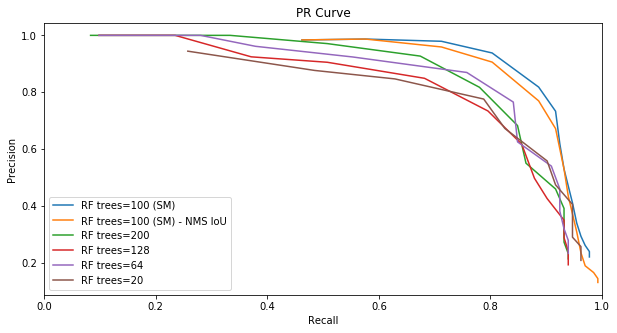

In [246]:
ax = plt.gca()

ax.figure.set_size_inches(10,5)

dfCurve_100_small_hog.plot(x='Recall', y='Precision', ax=ax)
dfCurve_100_small_hog_nms_iou.plot(x='Recall', y='Precision', ax=ax)
dfCurve_200_nms2.plot(x='Recall', y='Precision', ax=ax)
# dfCurve_200_nms.plot(x='Recall', y='Precision', ax=ax)
dfCurve_128.plot(x='Recall', y='Precision', ax=ax)
dfCurve_64.plot(x='Recall', y='Precision', ax=ax)
dfCurve_20.plot(x='Recall', y='Precision', ax=ax)

ax.legend([
#     'RF trees=200 nms=0 (w/ Conf.)',
#     'RF trees=200',
    'RF trees=100 (SM)',
    'RF trees=100 (SM) - NMS IoU',
    'RF trees=200',
    'RF trees=128',
    'RF trees=64',
    'RF trees=20',
])

ax.set_xlim(0,1)
ax.set_ylabel('Precision')
ax.set_title('PR Curve')